<a href="https://colab.research.google.com/github/Astrid-Marin-Olarte/Machine-Learning/blob/main/Proyecto_Script.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Universidad Central](https://www.ucentral.edu.co/sites/default/files/inline-images/identificadores-Centrados_en_ti_logo-h.png)

# __CURSO DE MÉTODOS ESTADÍSTICOS PARA ANALÍTICA DE DATOS__ <br><br>

> ## __PRESENTACIÓN DEL PROYECTO DEL CURSO__ <br><br>
>
> ### Presenta: Astrid Marin Olarte<br>
> #### Facultad de Ingeniería y Ciencias Básicas <br>
> <br>
>
> ## __Contenido__
>> ### Análisis exploratorio de los datos
>> ### Métodos
>> ### Resultados
>> ### Conclusión
***

__<font color=#57aa008 >Predicir los patrones estructurales </font>__

In [ ]:
# Librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Análisis exploratorio de los datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
datos = pd.read_excel('/content/drive/MyDrive/Tesis Astrid/Datos.xlsx')

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5389 entries, 0 to 5388
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    5389 non-null   int64  
 1   Código levantamiento  5389 non-null   int64  
 2   Ambiente              5389 non-null   int64  
 3   Altitud               5389 non-null   int64  
 4   Latitud               5389 non-null   float64
 5   Longitud              5389 non-null   float64
 6   GENERO                5389 non-null   object 
 7   ESPECIE               5389 non-null   object 
 8   ALTURA                5389 non-null   int64  
 9   CAP                   5389 non-null   float64
 10  DAP                   5389 non-null   float64
 11  AREA                  5389 non-null   float64
 12  ESTRATO               5389 non-null   int64  
 13  COPA1                 5389 non-null   int64  
 14  COPA2                 5389 non-null   int64  
 15  COBERTURA            

In [ ]:
datos.columns

Index(['ID', 'Código levantamiento', 'Ambiente', 'Altitud', 'Latitud',
       'Longitud', 'GENERO', 'ESPECIE', 'ALTURA', 'CAP', 'DAP', 'AREA',
       'ESTRATO', 'COPA1', 'COPA2', 'COBERTURA'],
      dtype='object')

In [ ]:
# Verificar si los datos tienen valores NA
df = pd.DataFrame(datos)

if df.isna().any().any():
    print("El DataFrame tiene al menos un valor NA.")
else:
    print("El DataFrame no tiene ningún valor NA.")

El DataFrame no tiene ningún valor NA.


In [ ]:
#Eliminar la columna ID
datos=datos.drop(['ID'], axis=1)

In [ ]:
datos.head()

,Código levantamiento,Ambiente,Altitud,Latitud,Longitud,GENERO,ESPECIE,ALTURA,CAP,DAP,AREA,ESTRATO,COPA1,COPA2,COBERTURA
0,1,3,162,460096.0,7131754.0,Henriettea,Henriettea fissanthera,7,12.566371,4.0,0.001257,2,4,2,8
1,1,3,162,460096.0,7131754.0,Hieronyma,Hieronyma alchorneoides,18,100.530965,32.0,0.080425,3,7,6,42
2,1,3,162,460096.0,7131754.0,Hieronyma,Hieronyma alchorneoides,9,18.849556,6.0,0.002827,2,4,2,8
3,1,3,162,460096.0,7131754.0,Ficus,Ficus nitidifolia,8,28.274334,9.0,0.006362,2,6,5,30
4,1,3,162,460096.0,7131754.0,Hieronyma,Hieronyma alchorneoides,26,87.964594,28.0,0.061575,4,7,6,42


In [ ]:
# Resumen estadístico de las variables numéricas
datos.describe().T

,count,mean,std,min,25%,50%,75%,max
Código levantamiento,5389.0,7.750789e+00,4.219926e+00,1.000000,4.000000e+00,8.000000e+00,1.000000e+01,1.700000e+01
Ambiente,5389.0,1.433290e+00,1.152550e+00,0.000000,0.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00
Altitud,5389.0,1.591872e+02,1.440927e+01,120.000000,1.590000e+02,1.610000e+02,1.650000e+02,1.800000e+02
Latitud,5389.0,3.841113e+05,1.555322e+05,4360.180000,4.459810e+05,4.493100e+05,4.600960e+05,4.650170e+05
Longitud,5389.0,6.040860e+06,2.431799e+06,71190.760000,7.111833e+06,7.128848e+06,7.129877e+06,7.131754e+06
ALTURA,5389.0,9.163296e+00,5.828792e+00,1.000000,5.000000e+00,7.000000e+00,1.200000e+01,4.000000e+01
CAP,5389.0,2.982380e+01,2.825514e+01,3.000000,1.256637e+01,1.884956e+01,3.141593e+01,3.298672e+02
DAP,5389.0,9.493209e+00,8.993890e+00,0.954930,4.000000e+00,6.000000e+00,1.000000e+01,1.050000e+02
AREA,5389.0,1.343000e-02,3.357508e-02,0.000072,1.256637e-03,2.827433e-03,7.853982e-03,8.659015e-01
ESTRATO,5389.0,2.095936e+00,7.373533e-01,0.000000,2.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00


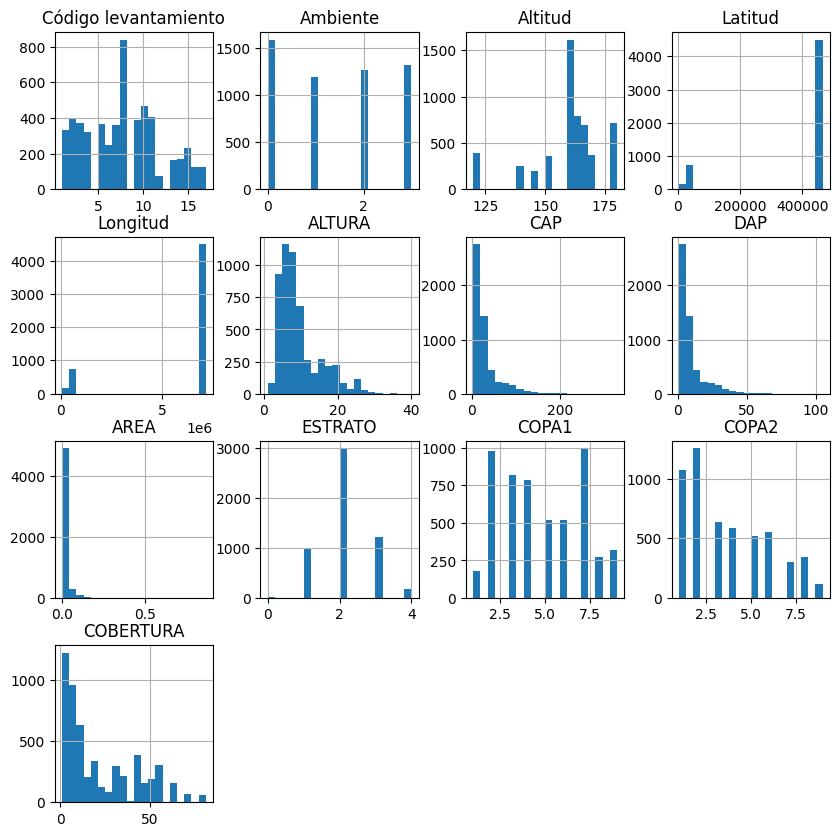

In [ ]:
#Histograma de las variables númericas
datos.hist(bins=20, figsize=(10, 10)) #bins el número de barras
plt.show()

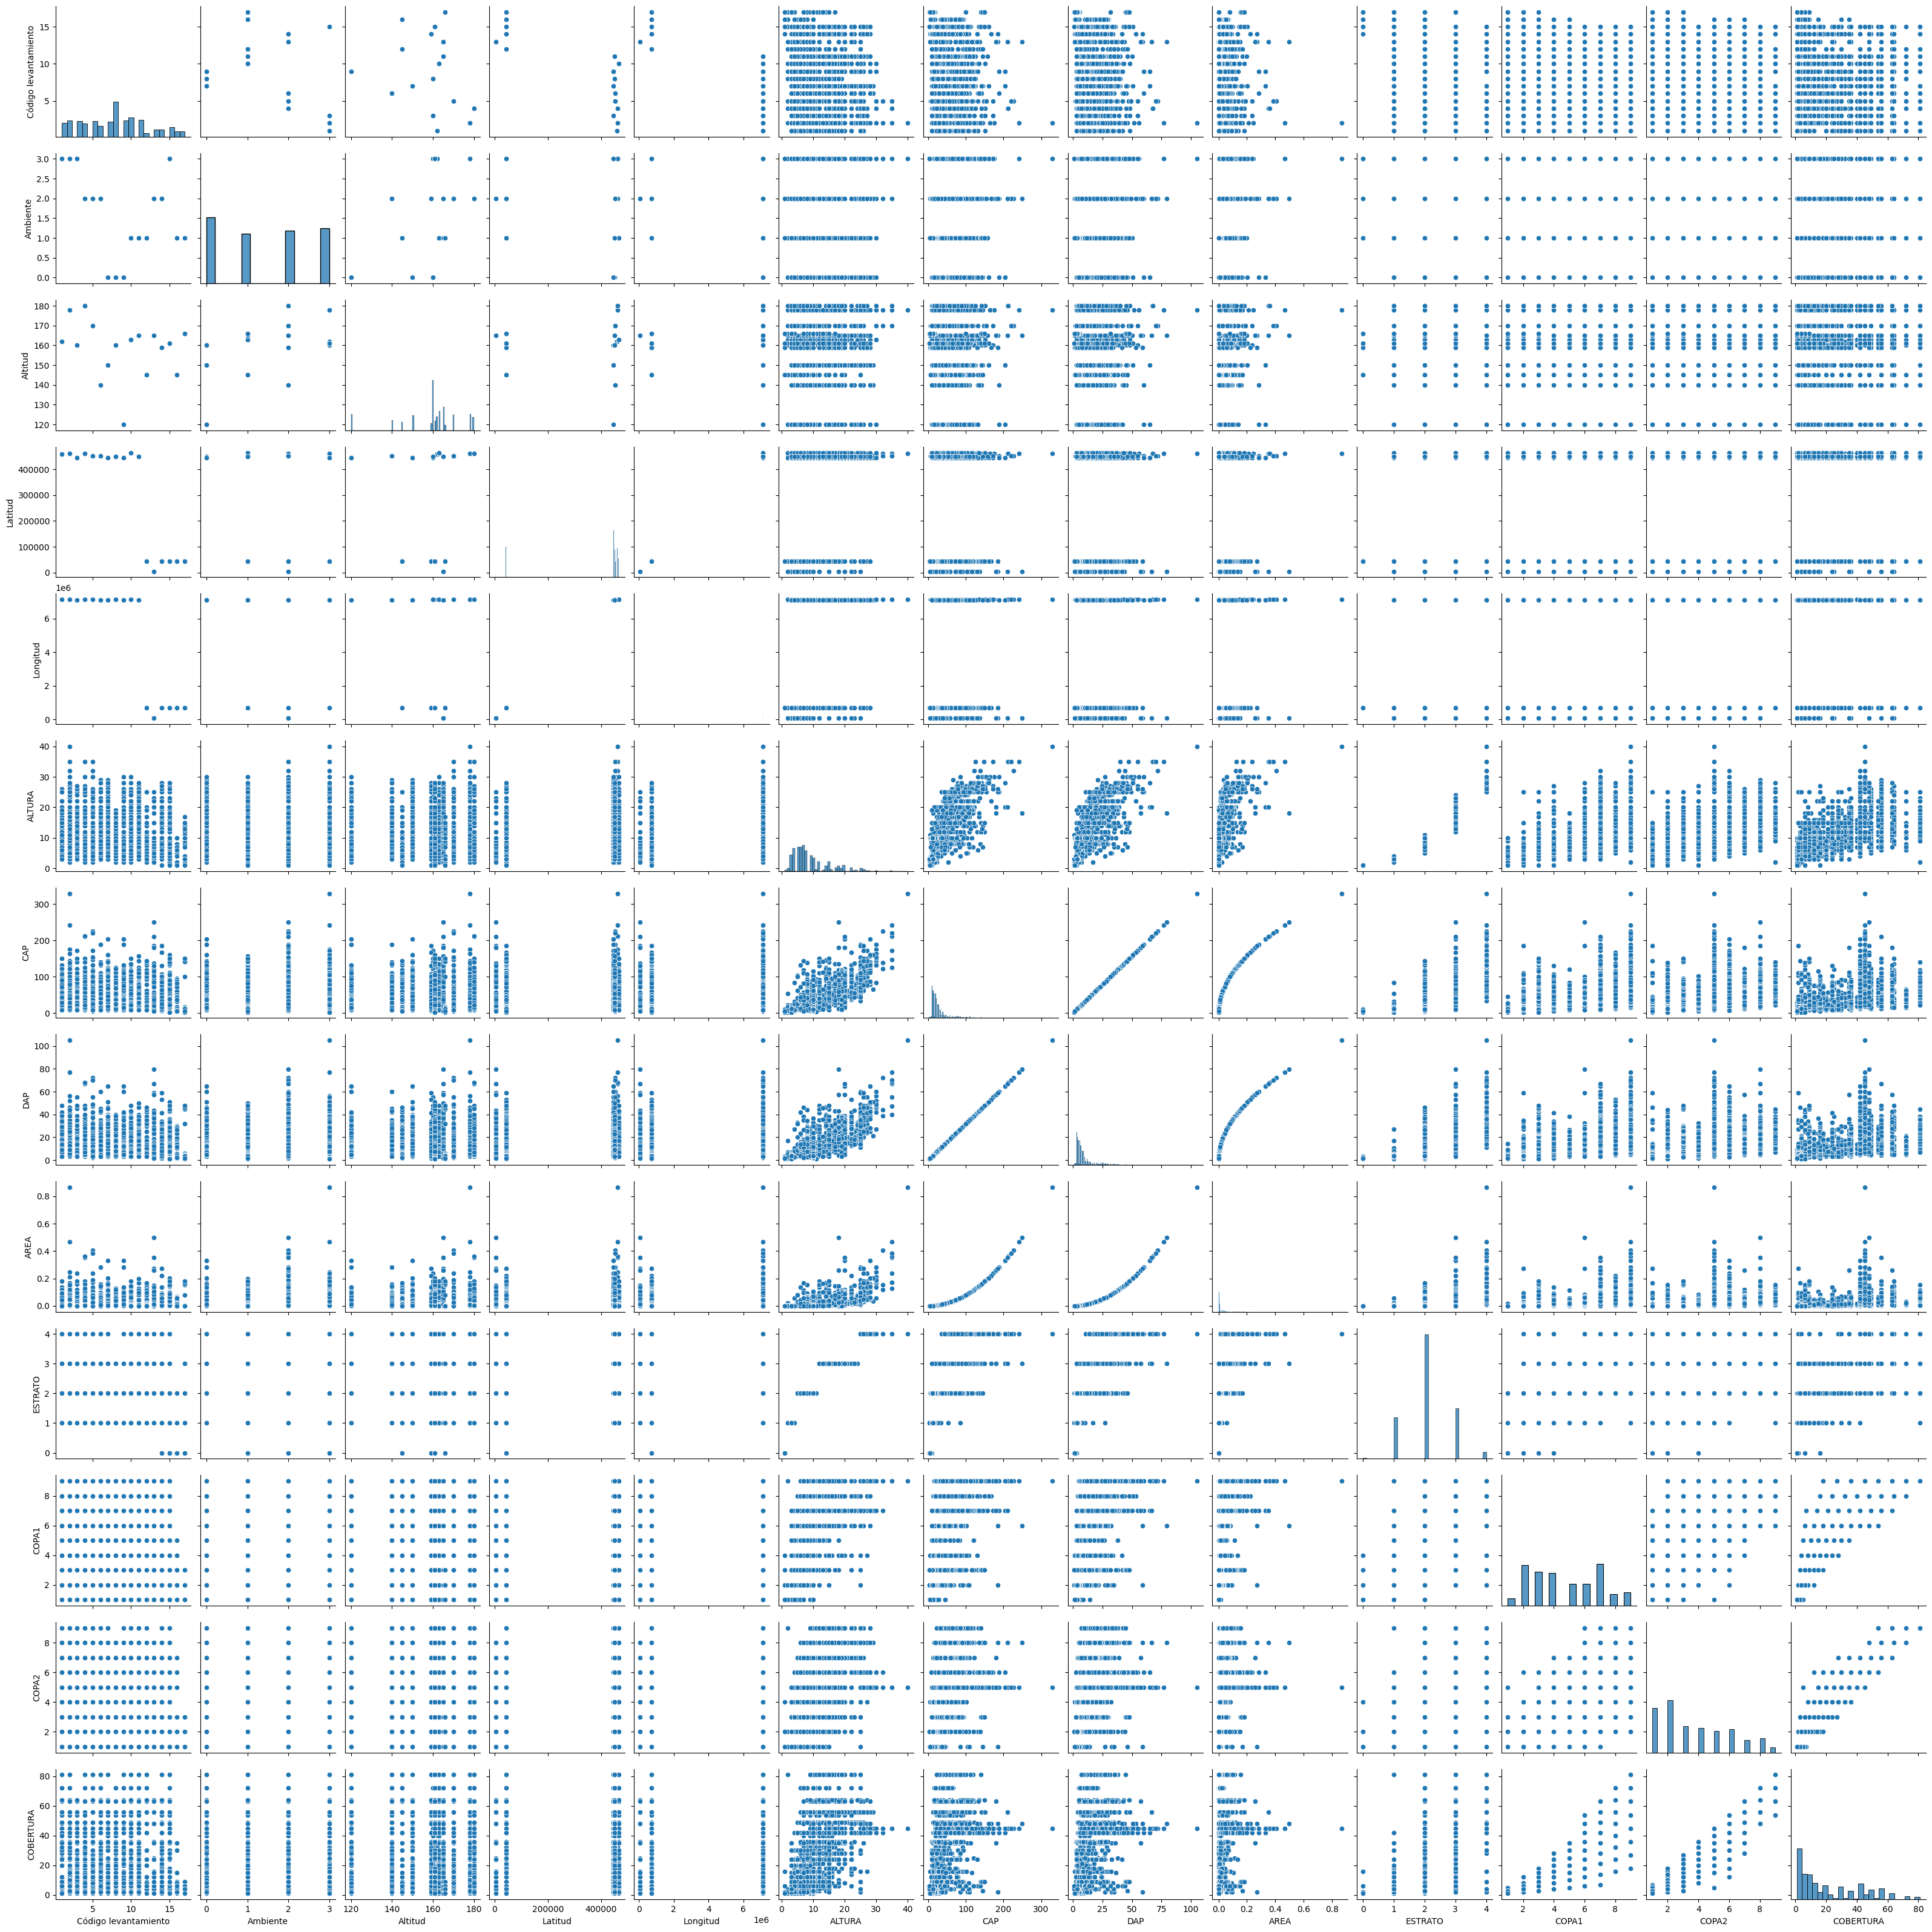

In [ ]:
#Gráficos de dispersión
sns.pairplot(datos)
plt.show()

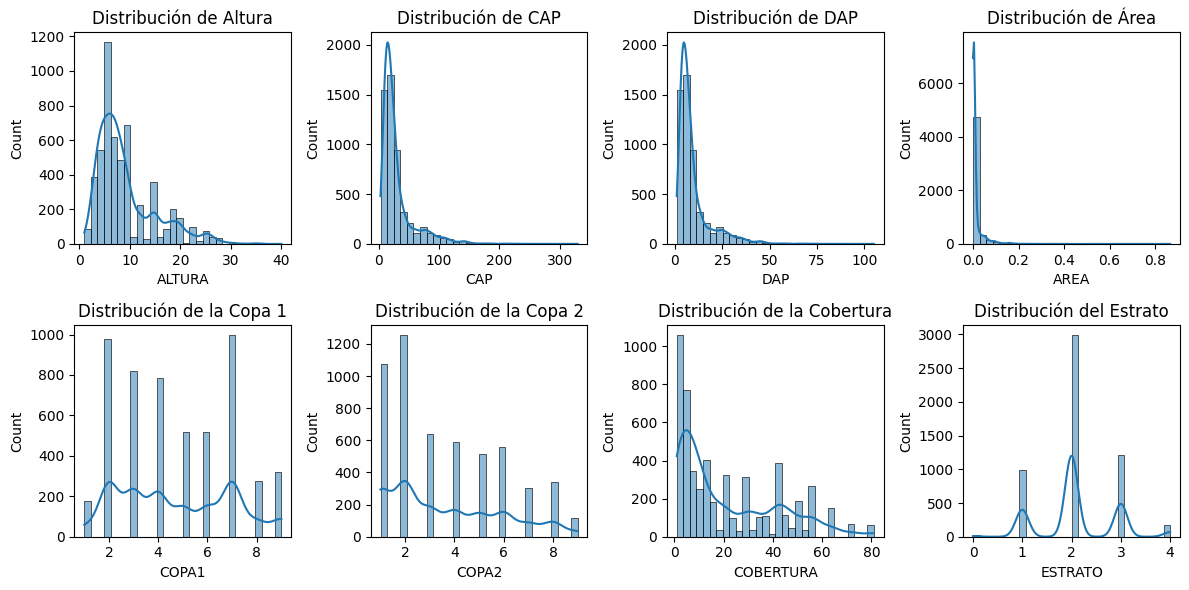

In [ ]:
# Visualización de la densidad de KERNEL
plt.figure(figsize=(12, 6))

#ALTURA
plt.subplot(2, 4, 1)
sns.histplot(datos['ALTURA'], bins=30, kde=True)
plt.title('Distribución de Altura')

#CAP
plt.subplot(2, 4, 2)
sns.histplot(datos['CAP'], bins=30, kde=True)
plt.title('Distribución de CAP')

#DAP
plt.subplot(2, 4, 3)
sns.histplot(datos['DAP'], bins=30, kde=True)
plt.title('Distribución de DAP')

#AREA
plt.subplot(2, 4, 4)
sns.histplot(datos['AREA'], bins=30, kde=True)
plt.title('Distribución de Área')

#COPA 1
plt.subplot(2, 4, 5)
sns.histplot(datos['COPA1'], bins=30, kde=True)
plt.title('Distribución de la Copa 1')

#COPA 2
plt.subplot(2, 4, 6)
sns.histplot(datos['COPA2'], bins=30, kde=True)
plt.title('Distribución de la Copa 2')

#COBERTURA
plt.subplot(2, 4, 7)
sns.histplot(datos['COBERTURA'], bins=30, kde=True)
plt.title('Distribución de la Cobertura')

#ESTRATO
plt.subplot(2, 4, 8)
sns.histplot(datos['ESTRATO'], bins=30, kde=True)
plt.title('Distribución del Estrato')

plt.tight_layout()  #espaciado entre los gráficos
plt.show()

<ipython-input-13-ece9c0d41b5c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = datos.corr()


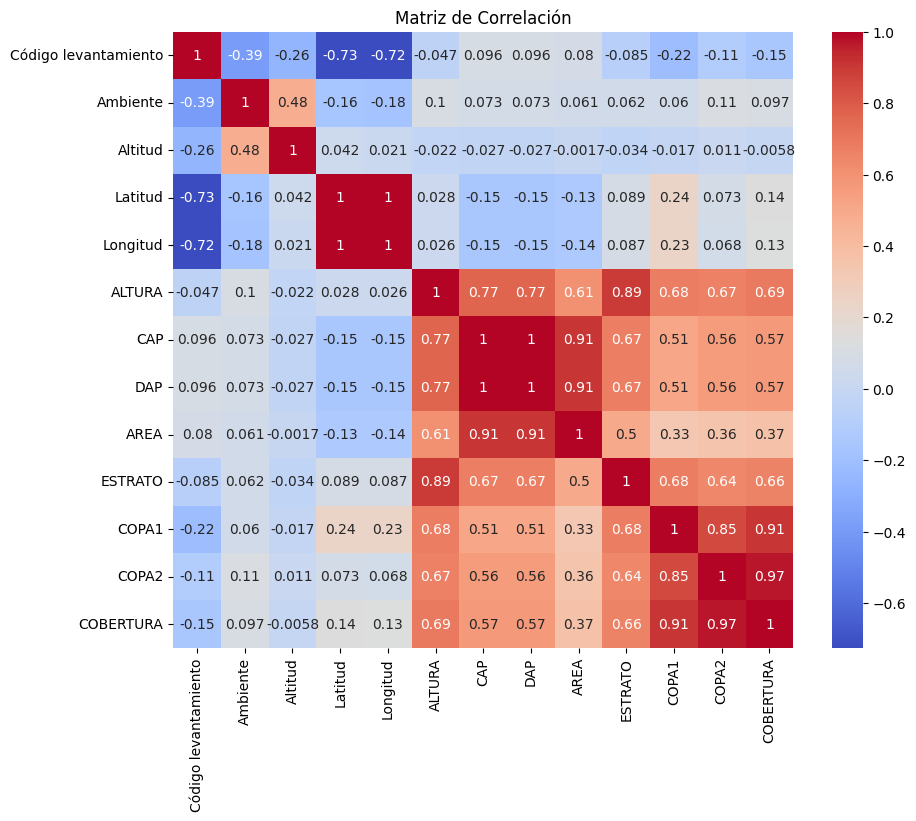

In [ ]:
# Mapa de calor de la Matriz de correlación
correlation_matrix = datos.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

In [ ]:
import plotly.express as px

Var = datos[['Código levantamiento', 'Ambiente', 'Altitud', 'Latitud', 'Longitud', 'ALTURA', 'CAP', 'DAP', 'AREA', 'COPA1', 'COPA2', 'COBERTURA']]
grupo = datos.ESTRATO

for variable in Var:
    fig = px.violin(datos, y=variable, color=grupo, box=True,
                    color_discrete_map={'G1': '#66C2A5', 'G2': '#FC8D62', 'G3': '#8DA0CB'},
                    title=f' Diagrama de Violin {variable}')

    fig.update_layout(height=400, width=400)

    fig.show()

In [ ]:
#Según las gráficas elimino columnas
datos=datos.drop(['Código levantamiento','Altitud', 'Latitud', 'Longitud', 'ALTURA','ESPECIE','CAP','DAP','COPA1','COPA2'], axis=1)

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5389 entries, 0 to 5388
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ambiente   5389 non-null   int64  
 1   GENERO     5389 non-null   object 
 2   AREA       5389 non-null   float64
 3   ESTRATO    5389 non-null   int64  
 4   COBERTURA  5389 non-null   int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 210.6+ KB


<ipython-input-17-624061f03700>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



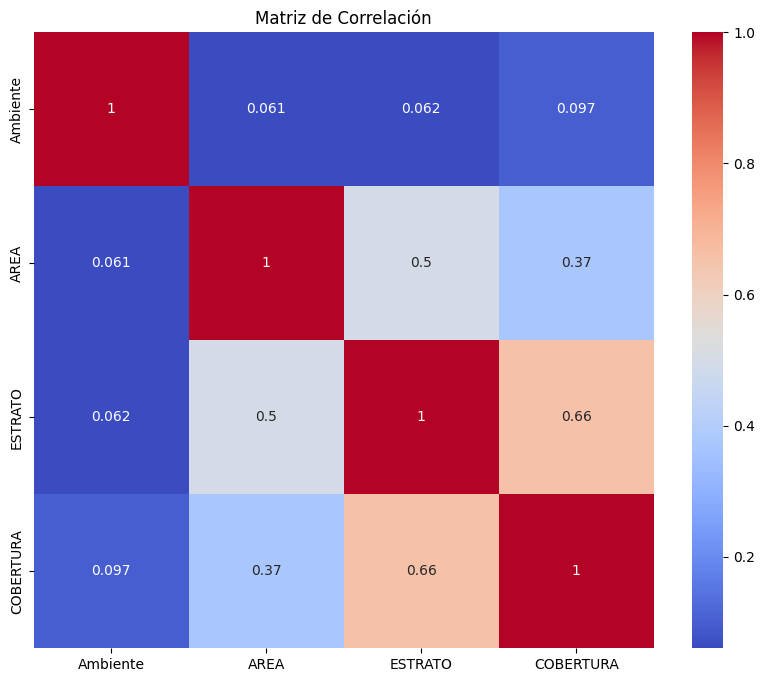

In [ ]:
correlation_matrix = datos.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

# Métodos a implementar

*   Random Forest (RF)
*   LightGBM
*   Support Vector Machine (SVM)
*   Redes Neuronales (RN)

### Random Forest

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
datos = pd.get_dummies(datos, columns=['GENERO'], drop_first=True)

In [ ]:
X = datos.drop(["ESTRATO"],axis = 1)
y = datos.ESTRATO

# División 70% de datos para entrenamiento, 30% de datos para test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
model = RandomForestClassifier()
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Configurar la búsqueda de cuadrícula con validación cruzada
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Ajustar el modelo a los datos
grid_search.fit(X_train, y_train)

# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid_search.best_params_)

Mejores hiperparámetros: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
# Modelo de Random Forest
BA_model = RandomForestClassifier(n_estimators=50, max_depth=None, min_samples_leaf= 1,
                                  min_samples_split=10, criterion='gini')

# Entrenar el modelo de Random Forest
BA_model.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=10, n_estimators=50)

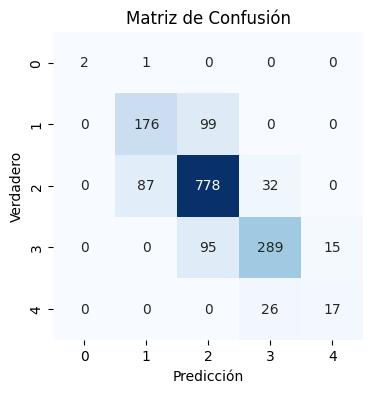

In [ ]:
# Predicción del modelo
y_pred = BA_model.predict(X_test)

#Matriz de confusión
matriz = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(4, 4))
sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión')
plt.show()

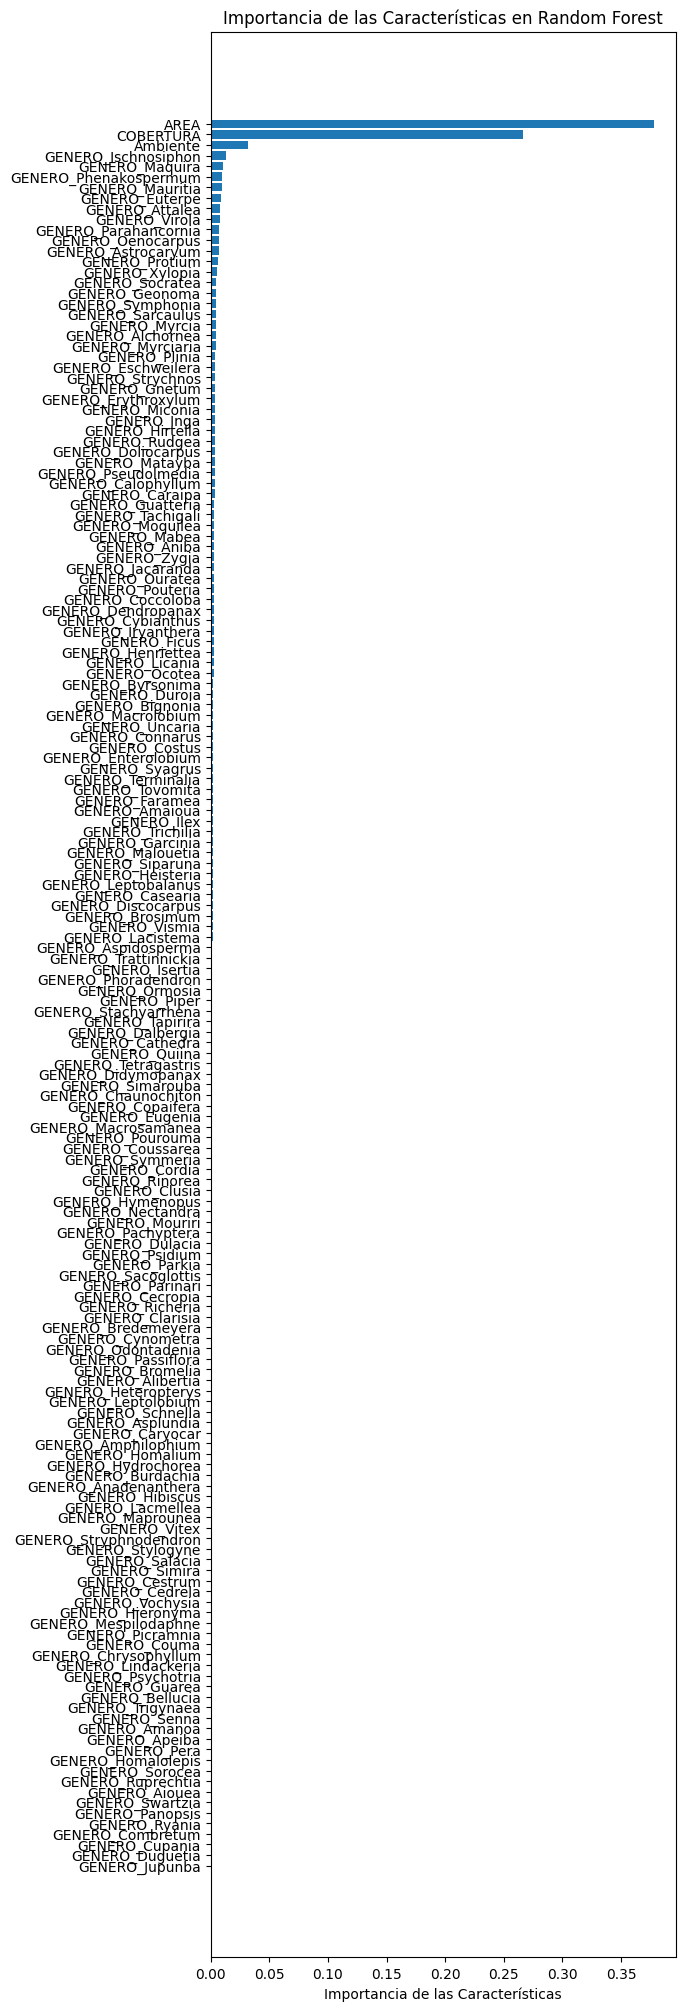

In [ ]:
# Importancia de las variables
importances = BA_model.feature_importances_
feature_names = X.columns

# Ordenar las importancias de las características
indices = importances.argsort()

# Graficar
plt.figure(figsize=(6, 25))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), feature_names[indices])
plt.xlabel('Importancia de las Características')
plt.title('Importancia de las Características en Random Forest')
plt.show()

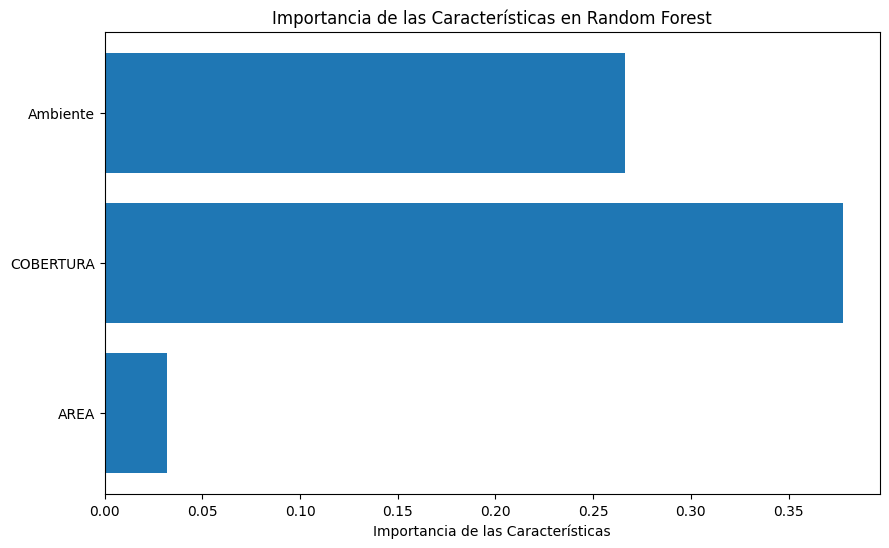

In [ ]:
importances = importances.reshape(166, 1)
importances = importances[:3]
importances_reshaped = importances.reshape(3,)
selected_columns = ["AREA", "COBERTURA", "Ambiente"]
X_selected = X[selected_columns]
feature_names = X_selected.columns

# Graficar las importancias de las 3 características principales
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_names)), importances_reshaped, align='center')
plt.yticks(range(len(feature_names)), feature_names)
plt.xlabel('Importancia de las Características')
plt.title('Importancia de las Características en Random Forest')
plt.show()

In [ ]:
# Calcular medida de desempeño
classification_rep = classification_report(y_test, y_pred)
print("Reporte de Clasificación:")
print(classification_rep)

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.67      0.64      0.65       275
           2       0.80      0.87      0.83       897
           3       0.83      0.72      0.77       399
           4       0.53      0.40      0.45        43

    accuracy                           0.78      1617
   macro avg       0.77      0.66      0.70      1617
weighted avg       0.78      0.78      0.78      1617



In [ ]:
mse_RF = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error en el conjunto de prueba: {mse_RF}")
r2_RF = r2_score(y_test, y_pred)
print(f'R-squared (R^2): {r2_RF}')

Mean Squared Error en el conjunto de prueba: 0.21954236239950525
R-squared (R^2): 0.5734523729909271


####__<font color=#57aa008 >Interpretación </font>__

* Clase 0: La clase 0 tiene una precisión perfecta (1.00), lo que significa que todas las instancias clasificadas como clase 0 son realmente de clase 0. Sin embargo, tiene un recall de 0.67, lo que indica que algunas instancias de clase 0 no fueron identificadas correctamente. **Entonces el modelo tiene problemas para detectar esa clase, pero cuando lo logra es confiable.**

* Clase 1: La clase 1 tiene una precisión de 0.66, lo que significa que alrededor del 66% de las instancias clasificadas como clase 1 son verdaderamente de clase 1. El recall es 0.62, lo que indica que el modelo identificó correctamente el 62% de las instancias de clase 1.

* Clase 2: Esta clase tiene buenos valores tanto de precisión (0.80) como de recall (0.86), indicando un buen rendimiento del modelo para esta clase.

* Clase 3: La clase 3 tiene valores razonables de precisión (0.83) y recall (0.75).

* Clase 4: La clase 4 muestra una precisión y recall más bajos, indicando que el modelo tiene dificultades para identificar correctamente instancias de esta clase, también es debido a la poca cantidad de datos para esta clase.



* Un MSE de 0.2195 indica que el modelo es relativamente preciso.
* Un $R^2$ de 0.5734 indica que el modelo se ajusta relativamente bien a los datos.

### LightGBM

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Crear un conjunto de datos ligero para LightGBM
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Definir parámetros del modelo
params = {
    'objective': 'regression',
    'metric': 'mse',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

# Entrenar el modelo sin early stopping
num_round = 100
bst = lgb.train(params, train_data, num_round, valid_sets=[test_data])

# Predicciones en el conjunto de prueba
y_pred_lgb = bst.predict(X_test, num_iteration=bst.best_iteration)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000394 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 256
[LightGBM] [Info] Number of data points in the train set: 3772, number of used features: 53
[LightGBM] [Info] Start training from score 2.082980


In [ ]:
# Calcular el Mean Squared Error y R2
mse_lgb = mean_squared_error(y_test, y_pred_lgb)
print(f"Mean Squared Error en el conjunto de prueba: {mse_lgb}")
r2_lgb = r2_score(y_test, y_pred_lgb)
print(f'R-squared (R^2): {r2_lgb}')

Mean Squared Error en el conjunto de prueba: 0.15975117286341023
R-squared (R^2): 0.6896203404570935


####__<font color=#57aa008 >Interpretación </font>__

La ventaja de este modelo basado en  árboles de decisión, es que para las variables categoricas como en este caso el Género, va a implementar un método que funciona con estas categorías que han sido codificadas con enteros.

* Un MSE de 0.1597 indica que el modelo es relativamente preciso.
* Un $R^2$ de 0.6896 indica que el modelo se ajusta relativamente bien a los datos.

### Support Vector Machine (SVM)

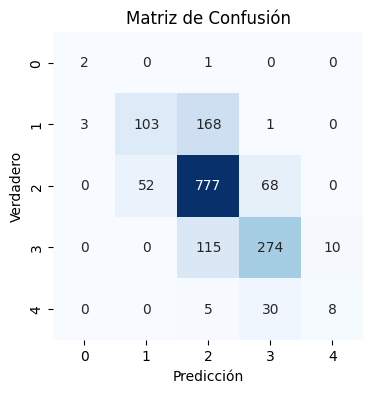

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Crear el modelo SVM
svm_model = SVC(kernel='linear', C=1)

# Entrenar el modelo
svm_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_svm = svm_model.predict(X_test)

#Matriz de confusión
matriz_svm = confusion_matrix(y_test,y_pred_svm)
plt.figure(figsize=(4, 4))
sns.heatmap(matriz_svm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Calcular y mostrar diversas métricas
accuracy = accuracy_score(y_test, y_pred_svm)
precision = precision_score(y_test, y_pred_svm, average='weighted')
recall = recall_score(y_test, y_pred_svm, average='weighted')
f1 = f1_score(y_test, y_pred_svm, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred_svm)
class_report = classification_report(y_test, y_pred_svm)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')
print('Classification Report:')
print(class_report)

Accuracy: 0.72
Precision: 0.71
Recall: 0.72
F1-score: 0.70
Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.67      0.50         3
           1       0.66      0.37      0.48       275
           2       0.73      0.87      0.79       897
           3       0.73      0.69      0.71       399
           4       0.44      0.19      0.26        43

    accuracy                           0.72      1617
   macro avg       0.59      0.56      0.55      1617
weighted avg       0.71      0.72      0.70      1617



In [ ]:
# Calcular el MSE y R^2
mse_svm = mean_squared_error(y_test, y_pred_svm)
print(f'Mean Squared Error (MSE): {mse_svm:.2f}')
r2_svm = r2_score(y_test, y_pred_svm)
print(f'R-squared (R^2): {r2_svm}')

Mean Squared Error (MSE): 0.29
R-squared (R^2): 0.43046880224704065


####__<font color=#57aa008 >Interpretación </font>__

* **Precision:** SVM clasificó correctamente el 72% de las instancias.
* **Recall:** por cada instancia positiva real, el 72% se identifica correctamente como positiva.
* **F1-score:** es 0.70, lo que indica un equilibrio moderado entre la precisión y el recall.

Cabe resaltar que es importante tener en cuenta que el rendimiento del modelo varía según las clases. Para la clase 0, la precisión es baja (0,40) mientras que el recall es alto (0,67). Esto sugiere que el modelo tiende a predecir instancias como clase 0 incluso cuando pertenecen a otras clases. Por el contrario, para la clase 4, la precisión es moderada (0,44) mientras que el recall es bajo (0,19). Esto sugiere que el modelo tiende a pasar por alto algunas instancias pertenecientes a la clase 4.

### Redes neuronales

* Redes neuronales de autoencoders
* Redes neuronales generativas adversariales

* Las Redes Neuronales de Autoencoders son un tipo de red neuronal que se utiliza para aprender representaciones eficientes de los datos de entrada. Consisten en una red codificadora que reduce la dimensionalidad de los datos de entrada a un espacio latente y una red decodificadora que reconstruye los datos originales a partir de esta representación reducida. Este enfoque puede ser especialmente útil para identificar patrones en datos complejos, como los patrones de distribución espacial de especies vegetales en diferentes capas de la estructura vertical.

* Las Redes Neuronales Generativas Adversariales (GAN) se utilizan comúnmente para generar nuevas muestras de datos a partir de un conjunto dado, pero no son inherentemente diseñadas para identificar patrones en datos espaciales.

#### Redes neuronales de autoencoders

Epoch 1/100
118/118 [==============================] - 1s 4ms/step - loss: 1.2302 - val_loss: 1.0741
Epoch 2/100
118/118 [==============================] - 0s 3ms/step - loss: 1.1096 - val_loss: 0.9795
Epoch 3/100
118/118 [==============================] - 0s 3ms/step - loss: 1.0517 - val_loss: 0.9482
Epoch 4/100
118/118 [==============================] - 0s 3ms/step - loss: 1.0312 - val_loss: 0.9345
Epoch 5/100
118/118 [==============================] - 0s 4ms/step - loss: 1.0203 - val_loss: 0.9259
Epoch 6/100
118/118 [==============================] - 0s 3ms/step - loss: 1.0128 - val_loss: 0.9194
Epoch 7/100
118/118 [==============================] - 0s 3ms/step - loss: 1.0068 - val_loss: 0.9142
Epoch 8/100
118/118 [==============================] - 0s 3ms/step - loss: 1.0018 - val_loss: 0.9097
Epoch 9/100
118/118 [==============================] - 0s 3ms/step - loss: 0.9975 - val_loss: 0.9059
Epoch 10/100
118/118 [==============================] - 0s 3ms/step - loss: 0.9940 - val_lo

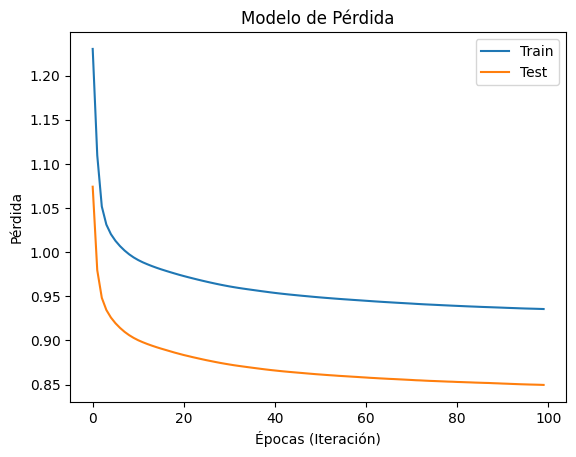

51/51 [==============================] - 0s 2ms/step


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import Adam
import matplotlib.pyplot as plt

# Escalar los datos para mejorar el rendimiento del modelo
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, X_scaled, test_size=0.3, random_state=0)

# Construir el modelo de autoencoder
input_dim = X_train.shape[1]  # Número de características de entrada
encoding_dim = 5  # Número de neuronas en la capa de codificación

# Definir la arquitectura del autoencoder
input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = Model(input_layer, decoded)

# Compilar el modelo
adam = Adam(lr=0.001)  # Optimizador
autoencoder.compile(optimizer=adam, loss='mean_squared_error')

# Entrenar el modelo
history = autoencoder.fit(X_train, X_train, epochs=100, batch_size=32, shuffle=True, validation_data=(X_test, X_test), verbose=1)

# Visualizar el rendimiento del autoencoder (pérdida)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Modelo de Pérdida')
plt.ylabel('Pérdida')
plt.xlabel('Épocas (Iteración)')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Obtener las representaciones codificadas de los datos
encoded_X_train = autoencoder.predict(X_train)
encoded_X_test = autoencoder.predict(X_test)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.metrics import mean_squared_error

# Escalar los datos para mejorar el rendimiento del modelo
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)

# Construir el autoencoder
input_dim = X_train.shape[1]  # Número de características de entrada
encoding_dim = 5  # Número de neuronas en la capa de codificación

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el autoencoder
autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, shuffle=True, validation_data=(X_test, X_test))

# Obtener las representaciones codificadas de los datos
encoded_X_train = autoencoder.predict(X_train)
encoded_X_test = autoencoder.predict(X_test)

Epoch 1/50
118/118 [==============================] - 1s 6ms/step - loss: 1.2302 - val_loss: 1.0766
Epoch 2/50
118/118 [==============================] - 0s 4ms/step - loss: 1.1106 - val_loss: 0.9788
Epoch 3/50
118/118 [==============================] - 1s 5ms/step - loss: 1.0491 - val_loss: 0.9465
Epoch 4/50
118/118 [==============================] - 1s 4ms/step - loss: 1.0282 - val_loss: 0.9335
Epoch 5/50
118/118 [==============================] - 1s 5ms/step - loss: 1.0180 - val_loss: 0.9256
Epoch 6/50
118/118 [==============================] - 1s 4ms/step - loss: 1.0108 - val_loss: 0.9195
Epoch 7/50
118/118 [==============================] - 0s 3ms/step - loss: 1.0051 - val_loss: 0.9144
Epoch 8/50
118/118 [==============================] - 0s 3ms/step - loss: 1.0003 - val_loss: 0.9101
Epoch 9/50
118/118 [==============================] - 0s 3ms/step - loss: 0.9962 - val_loss: 0.9064
Epoch 10/50
118/118 [==============================] - 0s 4ms/step - loss: 0.9926 - val_loss: 0.9033

In [ ]:
# Calcular el error cuadrático medio entre la entrada y la salida del autoencoder
mse_train = mean_squared_error(X_train, encoded_X_train)
mse_test = mean_squared_error(X_test, encoded_X_test)

print(f"Error cuadrático medio en conjunto de entrenamiento: {mse_train}")
print(f"Error cuadrático medio en conjunto de prueba: {mse_test}")

Error cuadrático medio en conjunto de entrenamiento: 0.9469238648051029
Error cuadrático medio en conjunto de prueba: 0.8613627376030863


#####__<font color=#57aa008 >Interpretación </font>__

* Un MSE de 0.9469 indica que el autoencoder es relativamente impreciso en el conjunto de entrenamiento.

Sin embargo, el MSE en el conjunto de prueba es menor que el MSE en el conjunto de entrenamiento. Esto indica que el autoencoder se generaliza bien a los datos nuevos.

Entonces algunas sugerencias para mejorar el rendimiento del autoencoder:

* Aumentar el número de capas ocultas en el autoencoder.
* Aumentar el número de neuronas en cada capa oculta.
* Utilizar una función de activación diferente para las capas ocultas.
* Utilizar una función de pérdida diferente para el autoencoder.

Cabe resaltar que al tener pocos registros también se dificulta un buen entrenamiento para el modelo.

#### Redes neuronales generativas adversariales

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.layers import Input, Dense, LeakyReLU
from keras.models import Model, Sequential
from keras.optimizers import Adam

# Escalar los datos para mejorar el rendimiento del modelo
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Definir el generador
generator = Sequential()
generator.add(Dense(16, input_dim=X_scaled.shape[1], activation='relu'))
generator.add(Dense(X_scaled.shape[1], activation='linear'))

# Definir el discriminador
discriminator = Sequential()
discriminator.add(Dense(16, input_dim=X_scaled.shape[1], activation='relu'))
discriminator.add(Dense(1, activation='sigmoid'))

# Compilar el discriminador
discriminator.compile(optimizer=Adam(lr=0.0002, beta_1=0.5), loss='binary_crossentropy', metrics=['accuracy'])

# Congelar los pesos del discriminador durante el entrenamiento del generador
discriminator.trainable = False

# Definir el modelo GAN (Generative Adversarial Network)
gan_input = Input(shape=(X_scaled.shape[1],))
x = generator(gan_input)
gan_output = discriminator(x)

gan = Model(gan_input, gan_output)
gan.compile(optimizer=Adam(lr=0.0002, beta_1=0.5), loss='binary_crossentropy')

# Entrenamiento de la GAN
epochs = 10000
batch_size = 32

for epoch in range(epochs):
    # Generar muestras falsas
    noise = np.random.normal(0, 1, size=[batch_size, X_scaled.shape[1]])
    generated_data = generator.predict(noise)

    # Seleccionar muestras reales aleatorias
    idx = np.random.randint(0, X_scaled.shape[0], batch_size)
    real_data = X_scaled[idx]

    # Etiquetas para muestras reales y falsas
    labels_real = np.ones((batch_size, 1))
    labels_fake = np.zeros((batch_size, 1))

    # Entrenar el discriminador
    d_loss_real = discriminator.train_on_batch(real_data, labels_real)
    d_loss_fake = discriminator.train_on_batch(generated_data, labels_fake)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    # Generar ruido para entrenar el generador
    noise = np.random.normal(0, 1, size=[batch_size, X_scaled.shape[1]])
    labels_gan = np.ones((batch_size, 1))

    # Entrenar la GAN
    g_loss = gan.train_on_batch(noise, labels_gan)

    # Imprimir el progreso y guardar modelos generados a intervalos regulares
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Discriminator Loss: {d_loss[0]}, Generator Loss: {g_loss}")

# Generar datos sintéticos con el generador entrenado
noise_for_generation = np.random.normal(0, 1, size=[X_scaled.shape[0], X_scaled.shape[1]])
generated_data = generator.predict(noise_for_generation)

Se han truncado las últimas 5000 líneas del flujo de salida.
1/1 [==============================] - 0s 23ms/step
Epoch 5100, Discriminator Loss: 0.4234308898448944, Generator Loss: 1.218137264251709
1/1 [==============================] - 0s 43ms/step
Epoch 5200, Discriminator Loss: 0.44545169174671173, Generator Loss: 1.2887765169143677
1/1 [==============================] - 0s 34ms/step
Epoch 5300, Discriminator Loss: 0.4573341906070709, Generator Loss: 1.2060929536819458
1/1 [==============================] - 0s 20ms/step
Epoch 5400, Discriminator Loss: 0.5377996116876602, Generator Loss: 1.1460788249969482
1/1 [==============================] - 0s 19ms/step
Epoch 5500, Discriminator Loss: 0.4526616334915161, Generator Loss: 1.1723313331604004
1/1 [==============================] - 0s 44ms/step
Epoch 5600, Discriminator Loss: 0.4530709981918335, Generator Loss: 1.1618645191192627
1/1 [==============================] - 0s 40ms/step
Epoch 5700, Discriminator Loss: 0.3820761442184448, G

In [ ]:
# Generar datos sintéticos con el generador entrenado
noise_for_generation = np.random.normal(0, 1, size=[X_scaled.shape[0], X_scaled.shape[1]])
generated_data = generator.predict(noise_for_generation)

# Calcular el MSE entre los datos originales y los datos generados
mse = mean_squared_error(X_scaled, generated_data)

print(f"Mean Squared Error entre datos originales y generados: {mse}")

169/169 [==============================] - 0s 3ms/step
Mean Squared Error entre datos originales y generados: 1.102931985324676


#####__<font color=#57aa008 >Interpretación </font>__

* Un MSE de 1.4040594734697616 indica que la GAN es relativamente imprecisa.

Sin embargo, es importante tener en cuenta que la GAN está diseñada para generar datos nuevos que se parezcan a los datos originales. Por lo tanto, no necesariamente significa que la GAN sea mala.

En general, los resultados indican que la GAN es capaz de generar datos que se parecen a los datos originales. Sin embargo, puede ser posible mejorar el rendimiento de la GAN ajustando los parámetros del modelo:

* Utilizar una función de pérdida diferente para la GAN.
* Utilizar un optimizador diferente para entrenar la GAN.
* Utilizar un número diferente de épocas para entrenar la GAN.

### Red neuronal para la predicción de altura (Regresión)

In [ ]:
# Red neuronal para la predicción de altura (regresión)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

data = pd.read_excel('/content/drive/MyDrive/Tesis Astrid/Datos.xlsx')

data = data.drop(['ID','Código levantamiento','Altitud', 'Latitud', 'Longitud', 'ESTRATO','ESPECIE','CAP','DAP','COPA1','COPA2','GENERO'], axis=1)

X = data[['Ambiente', 'AREA', 'COBERTURA']]
y = data['ALTURA']

# Preprocesamiento de datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#Modelo
model = Sequential()
model.add(Dense(64, input_dim=3, activation='relu'))
model.add(Dense(1, activation='linear'))  # Se utiliza 'linear' porque es un problema de regresión

# Compilación del modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenamiento del modelo
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

In [ ]:
# Ingresar valores
ambiente = float(input("Ingrese el valor de Ambiente: "))
area = float(input("Ingrese el valor de AREA: "))
cobertura = float(input("Ingrese el valor de COBERTURA: "))

# Arreglo numpy con los valores
input_values = np.array([[ambiente, area, cobertura]])

# Escalar los valores de entrada
scaled_input = scaler.transform(input_values)

# Hacer predicciones
prediction = model.predict(scaled_input)

# Imprimir la predicción
print("La predicción de Altura es:", prediction[0, 0])

Ingrese el valor de Ambiente: 1
Ingrese el valor de AREA: 0.0038
Ingrese el valor de COBERTURA: 30


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



1/1 [==============================] - 0s 53ms/step
La predicción de Altura es: 8.927357


### Red neuronal para la predicción de Estrato (Clasificación)

In [ ]:
# Red neuronal para la predicción de Estrato (Clasificación)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

data = pd.read_excel('/content/drive/MyDrive/Tesis Astrid/Datos.xlsx')

data = data.drop(['ID','Código levantamiento','Altitud', 'Latitud', 'Longitud', 'ALTURA','ESPECIE','CAP','DAP','COPA1','COPA2','GENERO'], axis=1)

# Supongamos que 'df' es tu DataFrame
X = data[['Ambiente', 'AREA', 'COBERTURA']]
y = data['ESTRATO']

# Preprocesamiento de datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convertir etiquetas a enteros
y = y.astype(int)

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Diseño del modelo para clasificación
model = Sequential()
model.add(Dense(64, input_dim=3, activation='relu'))
model.add(Dense(5, activation='softmax'))  # 5 neuronas para 5 clases (0, 1, 2, 3, 4)

# Compilación del modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenamiento del modelo
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Ahora puedes hacer predicciones interactivas
ambiente = float(input("Ingrese el valor de Ambiente: "))
area = float(input("Ingrese el valor de AREA: "))
cobertura = float(input("Ingrese el valor de COBERTURA:"))

# Crear un arreglo numpy con los valores ingresados
input_values = np.array([[ambiente, area, cobertura]])

# Escalar los valores de entrada
scaled_input = scaler.transform(input_values)

# Hacer predicciones
prediction_probabilities = model.predict(scaled_input)
predicted_class = np.argmax(prediction_probabilities)

# Imprimir la predicción
print("La probabilidad de cada Estrao es:", prediction_probabilities)
print("El Estrato predicho es:", predicted_class)

Epoch 1/50
135/135 [==============================] - 2s 7ms/step - loss: 1.1195 - accuracy: 0.6316 - val_loss: 0.8648 - val_accuracy: 0.6642
Epoch 2/50
135/135 [==============================] - 0s 3ms/step - loss: 0.7971 - accuracy: 0.6648 - val_loss: 0.7585 - val_accuracy: 0.6688
Epoch 3/50
135/135 [==============================] - 0s 3ms/step - loss: 0.7412 - accuracy: 0.6681 - val_loss: 0.7279 - val_accuracy: 0.6818
Epoch 4/50
135/135 [==============================] - 0s 3ms/step - loss: 0.7188 - accuracy: 0.6794 - val_loss: 0.7132 - val_accuracy: 0.6967
Epoch 5/50
135/135 [==============================] - 0s 3ms/step - loss: 0.7063 - accuracy: 0.6889 - val_loss: 0.7040 - val_accuracy: 0.7022
Epoch 6/50
135/135 [==============================] - 0s 3ms/step - loss: 0.6980 - accuracy: 0.6922 - val_loss: 0.6907 - val_accuracy: 0.7013
Epoch 7/50
135/135 [==============================] - 0s 3ms/step - loss: 0.6901 - accuracy: 0.6957 - val_loss: 0.6834 - val_accuracy: 0.7041
Epoch 

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



#Conclusión

In [ ]:
print(f'MSE Random Forest: {mse_RF}')
print(f'MSE LightGBM: {mse_lgb}')
print(f'MSE SVM: {mse_svm}')

# Comparar las métricas entre los tres modelos
if mse_lgb < mse_RF and mse_lgb < mse_svm:
    print('El modelo LightGBM tiene un MSE menor, es mejor.')
elif mse_RF < mse_lgb and mse_RF < mse_svm:
    print('El modelo Random Forest tiene un MSE menor, es mejor.')
else:
    print('El modelo SVM tiene un MSE menor, es mejor.')

MSE Random Forest: 0.21954236239950525
MSE LightGBM: 0.15975117286341023
MSE SVM: 0.29313543599257885
El modelo LightGBM tiene un MSE menor, es mejor.
